In [54]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
%matplotlib inline

In [55]:
dfFB = pd.read_csv('fb.csv',index_col=False)
dfFB = dfFB[['person', 'timestamp_ms','content','category','date']]

dfSMS = pd.read_csv('sms.csv',index_col=False)
dfSMS = dfSMS[['person', 'timestamp_ms','content','category','date']]

dfMessages = dfSMS.append(dfFB, ignore_index=True, sort=False)

dfMessages['timestamp_ms'] = dfMessages['timestamp_ms'].astype(int)
dfMessages['date'] = dfMessages['timestamp_ms']/1000
dfMessages['date'] = dfMessages['date'].astype(int)
dfMessages['date'] = pd.to_datetime(dfMessages['date'], unit='s') 

In [56]:
sentSMS = list(dfMessages[dfMessages['category'] == 'sent sms']['date'])
receivedSMS = list(dfMessages[dfMessages['category'] == 'received sms']['date'])
sentFB = list(dfMessages[dfMessages['category'] == 'sent facebook']['date'])
receivedFB = list(dfMessages[dfMessages['category'] == 'received facebook']['date'])

## plotting individual

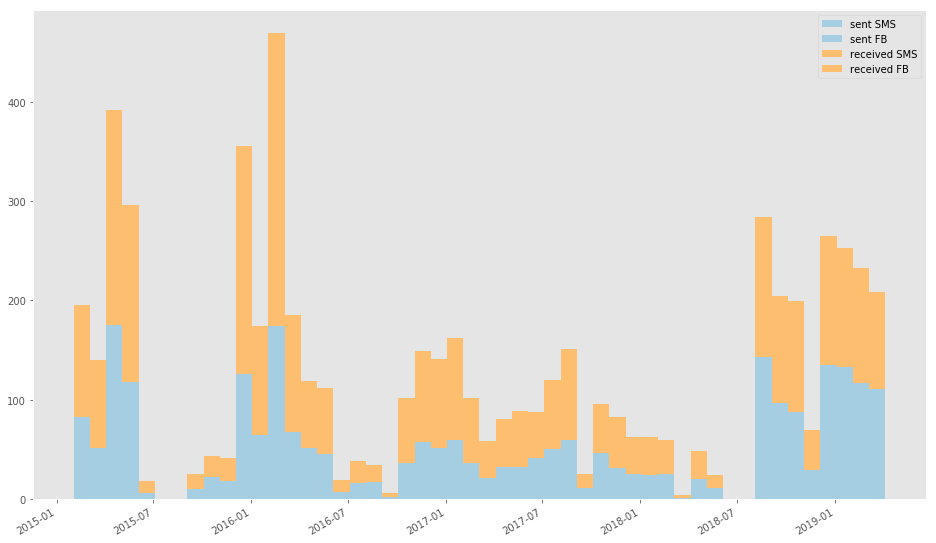

In [80]:
person = ''

dfPerson = dfMessages.loc[dfMessages['person'] == person].copy()

sentPersonSMS = list(dfPerson[dfPerson['category'] == 'sent sms']['date'])
receivedPersonSMS = list(dfPerson[dfPerson['category'] == 'received sms']['date'])
sentPersonFB = list(dfPerson[dfPerson['category'] == 'sent facebook']['date'])
receivedPersonFB = list(dfPerson[dfPerson['category'] == 'received facebook']['date'])

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(16,10))

    ax.hist([sentPersonSMS, sentPersonFB, receivedPersonSMS, receivedPersonFB], 
            label=['sent SMS', 'sent FB', 'received SMS','received FB'], 
            bins = 50, 
            stacked=True,
            color=[green1, green1, orange1, orange1])
#     ax.hist([sentPersonSMS, sentPersonFB, receivedPersonSMS, receivedPersonFB], 
#             label=['sent SMS','sent FB','received SMS','received FB'], 
#             bins = 50, 
#             stacked=True,
#             color=['#33a02c','#33a02c','#1f78b4','#1f78b4'])

    fig.autofmt_xdate()
    ax.legend()
    ax.grid(False)
    plt.show()

# plotting all messages, all people

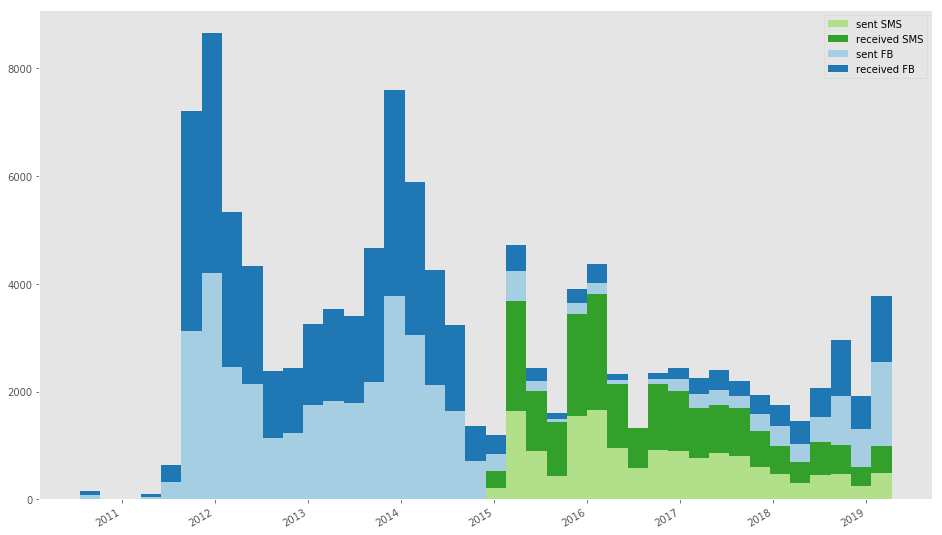

In [58]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(16,10))

    ax.hist([sentSMS, receivedSMS, sentFB, receivedFB], 
            label=['sent SMS','received SMS','sent FB','received FB'], 
            bins = 40, 
            stacked=True,
            color=['#b2df8a','#33a02c','#a6cee3','#1f78b4'])
    fig.autofmt_xdate()
    ax.legend()
    ax.grid(False)
    plt.show()

In [75]:
blue1 = '#b2df8a'
blue2 ='#33a02c'
green1 = '#a6cee3'
green2 = '#1f78b4'
red1 ='#fb9a99'
red2 = '#e31a1c'
purp1 = '#cab2d6'
purp2 = '#6a3d9a'
orange1 = '#fdbf6f'
orange2 = '#ff7f00'